# Capstone 3 
## RFM and Cohort Analysis

First we import

In [1]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

Load Dataset

In [2]:
df=pd.read_csv('../data/clean/Online Retail.csv')

C:\Users\alw-hp-17\AppData\Local\Temp\ipykernel_14796\407858579.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('../data/clean/Online Retail.csv')


Examine the data

In [3]:
df.sample(7)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
210880,555947,35912B,WHITE/PINK CHICK DECORATION,72,2011-06-08 10:45:00,1.06,14911,EIRE,76.32
36164,539464,21875,KINGS CHOICE MUG,2,2010-12-19 11:35:00,1.25,17913,United Kingdom,2.50
300179,564144,22269,EGG CUP NATURAL CHICKEN,16,2011-08-23 11:53:00,0.39,13939,United Kingdom,6.24
424714,574328,23240,SET OF 4 KNICK KNACK TINS DOILY,12,2011-11-04 09:05:00,4.15,13081,United Kingdom,49.80
266330,560938,22355,CHARLOTTE BAG SUKI DESIGN,42,2011-07-22 11:16:00,2.46,0,United Kingdom,103.32
380430,570718,22326,ROUND SNACK BOXES SET OF4 WOODLAND,18,2011-10-12 10:36:00,2.95,12518,Germany,53.10
154476,550360,21625,VINTAGE UNION JACK APRON,2,2011-04-18 10:55:00,6.95,14978,United Kingdom,13.90


In [5]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [6]:
df.sample(7)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
62798,541676,22383,LUNCH BAG SUKI DESIGN,10,2011-01-20 14:01:00,1.65,15379,United Kingdom,16.50
155250,550464,21329,DINOSAURS WRITING SET,2,2011-04-18 13:30:00,1.65,16550,United Kingdom,3.30
244104,559095,20727,LUNCH BAG BLACK SKULL.,10,2011-07-06 10:49:00,1.65,13198,United Kingdom,16.50
117120,546687,22744,MAKE YOUR OWN MONSOON CARD KIT,6,2011-03-16 09:58:00,2.95,16040,United Kingdom,17.70
227651,557630,22381,TOY TIDY PINK POLKADOT,5,2011-06-21 14:53:00,2.10,13178,United Kingdom,10.50
119043,546891,21907,I'M ON HOLIDAY METAL SIGN,1,2011-03-17 18:18:00,4.13,0,United Kingdom,4.13
208041,555644,23298,SPOTTY BUNTING,3,2011-06-06 13:24:00,4.95,16520,United Kingdom,14.85


One way to analyze is by doing cohorts. Time, behavior, size. Group Customers Together

Let's first create a time function:

In [7]:
# make a function the returns the year and month of column and day 1
def get_month(x):
    return dt.datetime(x.year,x.month,1)

In [8]:
#make a new column using our function for the cohort month
df['InvoiceMonth']=df['InvoiceDate'].apply(get_month)

In [9]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total,InvoiceMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01


In [11]:
#make a new column called Cohort Month
grouping=df.groupby('CustomerID')['InvoiceMonth']
df['CohortMonth']=grouping.transform('min')
df.sample(15)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total,InvoiceMonth,CohortMonth
211720,556072,47590B,PINK HAPPY BIRTHDAY BUNTING,6,2011-06-08 14:57:00,5.45,16126,United Kingdom,32.70,2011-06-01,2011-02-01
226330,557493,22659,LUNCH BOX I LOVE LONDON,1,2011-06-20 15:18:00,2.46,0,United Kingdom,2.46,2011-06-01,2010-12-01
428697,574680,21212,PACK OF 72 RETROSPOT CAKE CASES,24,2011-11-06 12:40:00,0.55,15078,United Kingdom,13.20,2011-11-01,2010-12-01
363078,569383,23298,SPOTTY BUNTING,9,2011-10-03 16:46:00,4.95,15159,United Kingdom,44.55,2011-10-01,2010-12-01
44440,540350,21156,RETROSPOT CHILDRENS APRON,2,2011-01-06 14:14:00,1.95,18283,United Kingdom,3.90,2011-01-01,2011-01-01
9771,537225,85049E,SCANDINAVIAN REDS RIBBONS,1,2010-12-05 16:41:00,1.25,12748,United Kingdom,1.25,2010-12-01,2010-12-01
415875,573556,84879,ASSORTED COLOUR BIRD ORNAMENT,48,2011-10-31 13:51:00,1.69,17675,United Kingdom,81.12,2011-10-01,2010-12-01
318238,565781,23173,REGENCY TEAPOT ROSES,12,2011-09-06 15:34:00,8.15,13098,United Kingdom,97.80,2011-09-01,2011-01-01
369296,569844,22747,POPPY'S PLAYHOUSE BATHROOM,6,2011-10-06 13:30:00,2.10,12626,Germany,12.60,2011-10-01,2011-01-01
431570,574856,48185,DOORMAT FAIRY CAKE,1,2011-11-07 12:06:00,14.13,0,United Kingdom,14.13,2011-11-01,2010-12-01


In [13]:
#create function to extract date as array
def get_date_int(df,column):
    year=df[column].dt.year
    month=df[column].dt.month
    day=df[column].dt.day
    return year, month, day

In [15]:
#months 
invoice_year,invoice_month,_=get_date_int(df,'InvoiceMonth')
cohort_year,cohort_month,_=get_date_int(df,'CohortMonth')

In [16]:
#differences
years_diff=invoice_year-cohort_year
months_diff=invoice_month-cohort_month

In [17]:
#convert to months
df['CohortIndex']=years_diff*12+months_diff+1

In [19]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total,InvoiceMonth,CohortMonth,CohortIndex
524873,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20,2011-12-01,2011-08-01,5
524874,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,2011-12-01,2011-08-01,5
524875,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011-12-01,2011-08-01,5
524876,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011-12-01,2011-08-01,5
524877,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,14.85,2011-12-01,2011-08-01,5


In [20]:
#monthly active customer from each CohortIndex
grouping=df.groupby(['CohortMonth','CohortIndex'])

In [22]:
cohort_data=grouping['CustomerID'].apply(pd.Series.nunique)

In [23]:
cohort_data #month, index, how many unique customers

CohortMonth  CohortIndex
2010-12-01   1              886
             2              325
             3              287
             4              341
             5              322
                           ... 
2011-10-01   2               86
             3               41
2011-11-01   1              323
             2               36
2011-12-01   1               41
Name: CustomerID, Length: 91, dtype: int64

In [24]:
cohort_data=cohort_data.reset_index()

In [25]:
cohort_data

,CohortMonth,CohortIndex,CustomerID
0,2010-12-01,1,886
1,2010-12-01,2,325
2,2010-12-01,3,287
3,2010-12-01,4,341
4,2010-12-01,5,322
...,...,...,...
86,2011-10-01,2,86
87,2011-10-01,3,41
88,2011-11-01,1,323
89,2011-11-01,2,36


In [27]:
#pivot table
cohort_counts=cohort_data.pivot(index='CohortMonth',columns='CohortIndex',values='CustomerID')

In [30]:
cohort_counts

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,886.0,325.0,287.0,341.0,322.0,353.0,322.0,310.0,314.0,351.0,332.0,446.0,236.0
2011-01-01,417.0,92.0,111.0,96.0,134.0,120.0,103.0,101.0,125.0,136.0,152.0,49.0,NaN
2011-02-01,380.0,71.0,71.0,108.0,103.0,94.0,96.0,106.0,94.0,116.0,26.0,NaN,NaN
2011-03-01,452.0,68.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0,NaN,NaN,NaN
2011-04-01,300.0,64.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,NaN,NaN,NaN,NaN
2011-05-01,284.0,54.0,49.0,49.0,59.0,66.0,75.0,27.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,242.0,42.0,38.0,64.0,56.0,81.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,188.0,34.0,39.0,42.0,51.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,169.0,35.0,42.0,41.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


This is the monthly time cohort
You could do the same for a daily cohort

In [31]:
#Retention Rate

In [32]:
cohort_sizes=cohort_counts.iloc[:,0]

In [33]:
cohort_sizes

CohortMonth
2010-12-01    886.0
2011-01-01    417.0
2011-02-01    380.0
2011-03-01    452.0
2011-04-01    300.0
2011-05-01    284.0
2011-06-01    242.0
2011-07-01    188.0
2011-08-01    169.0
2011-09-01    299.0
2011-10-01    358.0
2011-11-01    323.0
2011-12-01     41.0
Name: 1, dtype: float64

In [50]:
retention=cohort_counts.divide(cohort_sizes,axis=0)

In [51]:
retention

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,1.0,0.366817,0.323928,0.384876,0.363431,0.398420,0.363431,0.349887,0.354402,0.396163,0.374718,0.503386,0.266366
2011-01-01,1.0,0.220624,0.266187,0.230216,0.321343,0.287770,0.247002,0.242206,0.299760,0.326139,0.364508,0.117506,NaN
2011-02-01,1.0,0.186842,0.186842,0.284211,0.271053,0.247368,0.252632,0.278947,0.247368,0.305263,0.068421,NaN,NaN
2011-03-01,1.0,0.150442,0.252212,0.199115,0.223451,0.168142,0.267699,0.230088,0.278761,0.086283,NaN,NaN,NaN
2011-04-01,1.0,0.213333,0.203333,0.210000,0.196667,0.226667,0.216667,0.260000,0.073333,NaN,NaN,NaN,NaN
2011-05-01,1.0,0.190141,0.172535,0.172535,0.207746,0.232394,0.264085,0.095070,NaN,NaN,NaN,NaN,NaN
2011-06-01,1.0,0.173554,0.157025,0.264463,0.231405,0.334711,0.095041,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,1.0,0.180851,0.207447,0.223404,0.271277,0.111702,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,1.0,0.207101,0.248521,0.242604,0.124260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


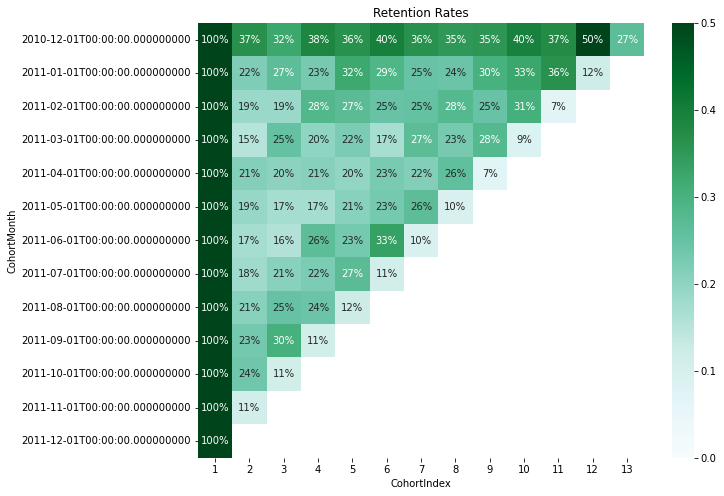

In [52]:
#build a heatmap
plt.figure(figsize=(10,8))
plt.title('Retention Rates')
sns.heatmap(data=retention,annot=True,fmt='.0%',vmin=0.0,vmax=0.5,cmap='BuGn')
plt.show()

In [56]:
#Average quantity purchased per cohort group
grouping=df.groupby(['CohortMonth','CohortIndex'])
cohort_data=grouping['Quantity'].mean()
cohort_data=cohort_data.reset_index()
average_quantity=cohort_data.pivot(index='CohortMonth',columns='CohortIndex',values='Quantity')

In [57]:
average_quantity

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,8.734088,8.500453,9.741506,10.440905,9.191516,10.126529,10.265069,9.047045,12.223630,11.807450,12.301646,9.386148,9.157543
2011-01-01,17.471086,13.471931,12.707503,15.283843,12.845407,15.388923,14.974063,14.991561,11.628981,10.623621,9.597151,10.184408,NaN
2011-02-01,11.201903,13.740634,19.032478,12.045838,12.335834,12.330517,13.571174,13.401471,10.965646,12.416324,13.390244,NaN,NaN
2011-03-01,9.962552,11.741027,13.310624,10.120573,13.756057,13.014265,13.456492,13.851474,11.324869,9.700103,NaN,NaN,NaN
2011-04-01,10.043702,10.417740,9.772586,11.870370,11.962770,8.691579,10.001070,9.678404,7.567251,NaN,NaN,NaN,NaN
2011-05-01,11.457044,9.745116,14.224062,12.757906,11.217013,8.758695,10.764495,113.763089,NaN,NaN,NaN,NaN,NaN
2011-06-01,10.664896,14.727072,10.869873,13.663137,10.690449,9.960707,9.506494,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,9.921021,13.750499,7.398021,8.178144,6.213636,7.164410,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,10.083230,6.199246,5.440127,6.150660,7.056730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


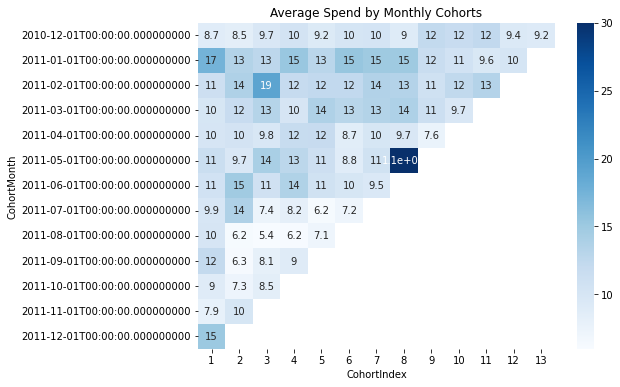

In [72]:
plt.figure(figsize=(8, 6))
plt.title('Average Spend by Monthly Cohorts')
sns.heatmap(data=average_quantity, annot=True,vmin=6,vmax=30, cmap='Blues')
plt.show()

In [60]:
#Average price of unite purchased per cohort group
grouping=df.groupby(['CohortMonth','CohortIndex'])
cohort_data=grouping['UnitPrice'].mean()
cohort_data=cohort_data.reset_index()
average_price=cohort_data.pivot(index='CohortMonth',columns='CohortIndex',values='UnitPrice')

In [61]:
average_price

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,4.846114,4.051594,4.484115,4.723230,4.009236,4.722745,4.442538,4.257767,4.954033,4.106399,4.322594,4.333767,4.924592
2011-01-01,3.223227,3.481534,3.016730,5.775651,3.082095,3.124309,2.905079,2.692672,2.625412,4.242837,2.799563,2.485795,NaN
2011-02-01,3.266707,3.857068,3.766296,3.100366,2.928080,2.799811,2.812427,3.201676,2.908180,2.935936,3.207406,NaN,NaN
2011-03-01,3.279121,4.202407,3.402691,3.219612,2.978370,2.718669,2.791632,2.804677,2.664487,2.385801,NaN,NaN,NaN
2011-04-01,3.379940,3.736087,3.271776,2.678310,2.927870,2.861061,2.871659,2.786892,2.610526,NaN,NaN,NaN,NaN
2011-05-01,3.881462,2.991740,2.649945,2.951047,2.672592,2.479837,2.629041,2.524830,NaN,NaN,NaN,NaN,NaN
2011-06-01,3.473344,2.838641,3.279335,2.785486,2.558372,3.055238,2.353231,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,2.970417,3.273174,2.746750,2.689895,2.375807,2.366538,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,3.018319,4.628975,4.916895,5.780107,5.617942,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
#Average Total Spent per cohort group
grouping=df.groupby(['CohortMonth','CohortIndex'])
cohort_data=grouping['Total'].mean()
cohort_data=cohort_data.reset_index()
average_total=cohort_data.pivot(index='CohortMonth',columns='CohortIndex',values='Total')

In [64]:
average_total

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,20.039831,17.143802,19.530483,21.495895,16.957675,21.629871,20.855487,18.567789,23.671709,24.756188,24.677016,21.227810,20.424623
2011-01-01,26.879364,25.099890,20.968463,31.234100,22.478426,26.280202,25.242561,25.493467,19.073907,22.332204,19.726770,19.781132,NaN
2011-02-01,17.867731,20.848444,21.458601,19.362843,17.691602,16.975979,22.165868,22.901765,18.789571,22.184108,23.503814,NaN,NaN
2011-03-01,17.589186,21.140281,22.693768,18.018162,21.105725,19.002534,22.034041,19.989688,16.812439,13.196587,NaN,NaN,NaN
2011-04-01,16.953243,21.029034,19.492656,18.736721,19.548146,14.999123,15.251953,15.966953,12.343080,NaN,NaN,NaN,NaN
2011-05-01,20.483248,17.341116,22.246943,20.896587,18.588493,14.115646,17.018132,234.534332,NaN,NaN,NaN,NaN,NaN
2011-06-01,23.984201,16.285624,19.949604,20.449080,15.345167,16.711627,13.219513,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,14.957554,23.532275,11.787192,13.017912,10.884557,11.684139,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,16.521615,13.157612,12.525072,15.882774,17.001513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
#recency, frequency, monetary
#percentile segmentation

In [90]:
spend_quartiles=pd.qcut(df['Total'],q=4,labels=range(1,5))

In [91]:
t_labels=['Guppy','Trout','Dolphin','Whale']

In [92]:
fish_quartiles=pd.qcut(df['Total'],q=4,labels=t_labels)

In [95]:
df['Fish_Quartile']=fish_quartiles

In [96]:
df[['CustomerID','Total','Spend_Quartile','Fish_Quartile']].sort_values('Total')

,CustomerID,Total,Spend_Quartile,Fish_Quartile
348728,16198,0.001,1,Guppy
151917,13952,0.001,1,Guppy
270161,15618,0.001,1,Guppy
350545,13405,0.001,1,Guppy
410516,0,0.060,1,Guppy
...,...,...,...,...
290506,0,11062.060,4,Whale
14456,0,13541.330,4,Whale
215474,15098,38970.000,4,Whale
59649,12346,77183.600,4,Whale


In [97]:
#create a snapshot day from the dataframe for RFM
snapshot_date=max(df.InvoiceDate)+dt.timedelta(days=1)

In [108]:
snapshot_date

Timestamp('2011-12-10 12:50:00')

In [109]:
df1=df.groupby(['CustomerID']).agg({
    'InvoiceDate':lambda x: (snapshot_date-x.max()).days, #recency
    'InvoiceNo':'count', #frequency
    'Total':'sum' #monetary_value
    })

In [110]:
df1

,InvoiceDate,InvoiceNo,Total
CustomerID,,,
0,1,132186,1754901.91
12346,326,1,77183.60
12347,2,182,4310.00
12348,75,31,1797.24
12349,19,73,1757.55
...,...,...,...
18280,278,10,180.60
18281,181,7,80.82
18282,8,12,178.05


In [111]:
#rename columns
df1.rename(columns={'InvoiceDate':'Recency','InvoiceNo':'Frequency','Total':'MonetaryValue'},inplace=True)

In [112]:
df1

,Recency,Frequency,MonetaryValue
CustomerID,,,
0,1,132186,1754901.91
12346,326,1,77183.60
12347,2,182,4310.00
12348,75,31,1797.24
12349,19,73,1757.55
...,...,...,...
18280,278,10,180.60
18281,181,7,80.82
18282,8,12,178.05


In [113]:
r_labels = range(3, 0, -1)
f_labels = range(1, 4)
m_labels = range(1, 4)
r_groups = pd.qcut(df1['Recency'], q=3, labels=r_labels)
f_groups = pd.qcut(df1['Frequency'], q=3, labels=f_labels)
m_groups = pd.qcut(df1['Frequency'], q=3, labels=m_labels)
df1 = df1.assign(R=r_groups.values, F=f_groups.values, M=m_groups.values)

In [114]:
df1

,Recency,Frequency,MonetaryValue,R,F,M
CustomerID,,,,,,
0,1,132186,1754901.91,3,3,3
12346,326,1,77183.60,1,1,1
12347,2,182,4310.00,3,3,3
12348,75,31,1797.24,2,2,2
12349,19,73,1757.55,3,3,3
...,...,...,...,...,...,...
18280,278,10,180.60,1,1,1
18281,181,7,80.82,1,1,1
18282,8,12,178.05,3,1,1


In [115]:
df1['RFM_Score'] = df1[['R','F','M']].sum(axis=1)

In [116]:
df1

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Score
CustomerID,,,,,,,
0,1,132186,1754901.91,3,3,3,9
12346,326,1,77183.60,1,1,1,3
12347,2,182,4310.00,3,3,3,9
12348,75,31,1797.24,2,2,2,6
12349,19,73,1757.55,3,3,3,9
...,...,...,...,...,...,...,...
18280,278,10,180.60,1,1,1,3
18281,181,7,80.82,1,1,1,3
18282,8,12,178.05,3,1,1,5


In [117]:
#rfm segment
def join_rfm(x):
    return str(x['R'])+str(x['F'])+str(x['M'])
df1['RFM_Segment']=df1.apply(join_rfm,axis=1)

In [118]:
df1

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Score,RFM_Segment
CustomerID,,,,,,,,
0,1,132186,1754901.91,3,3,3,9,3.03.03.0
12346,326,1,77183.60,1,1,1,3,1.01.01.0
12347,2,182,4310.00,3,3,3,9,3.03.03.0
12348,75,31,1797.24,2,2,2,6,2.02.02.0
12349,19,73,1757.55,3,3,3,9,3.03.03.0
...,...,...,...,...,...,...,...,...
18280,278,10,180.60,1,1,1,3,1.01.01.0
18281,181,7,80.82,1,1,1,3,1.01.01.0
18282,8,12,178.05,3,1,1,5,3.01.01.0


In [122]:
def rfm_level(df):
    if df['RFM_Score'] >= 9:
        return 'Top'
    elif ((df['RFM_Score'] >= 6) and (df['RFM_Score'] < 10)):
        return 'Middle'
    else:
        return 'Low'

In [123]:
df1['RFM_Level'] = df1.apply(rfm_level, axis=1)

In [124]:
df1

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Score,RFM_Segment,RFM_Level
CustomerID,,,,,,,,,
0,1,132186,1754901.91,3,3,3,9,3.03.03.0,Top
12346,326,1,77183.60,1,1,1,3,1.01.01.0,Low
12347,2,182,4310.00,3,3,3,9,3.03.03.0,Top
12348,75,31,1797.24,2,2,2,6,2.02.02.0,Middle
12349,19,73,1757.55,3,3,3,9,3.03.03.0,Top
...,...,...,...,...,...,...,...,...,...
18280,278,10,180.60,1,1,1,3,1.01.01.0,Low
18281,181,7,80.82,1,1,1,3,1.01.01.0,Low
18282,8,12,178.05,3,1,1,5,3.01.01.0,Low


In [125]:
rfm_level_agg = df1.groupby('RFM_Level').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
}).round(1)

In [126]:
rfm_level_agg

Recency Frequency MonetaryValue      
             mean      mean          mean count
RFM_Level                                      
Low         160.3      18.8         642.0  1926
Middle       52.9      84.5        1576.6  1591
Top          10.4     430.8        8390.9   822